#### Infiltration Calculations

Things needed to make calculations more accurate: 
- No inf or zeros present in data
- Find true asymtote for CO2_inside (seems to go below 400 "outside ppm")
- Get accurate ETC volume. (used 40,000 ft$^3$ here)
- Isolate Negative slopes
- Determine best days/times to isolate further


##### VolumetricFlowRate:

$$CFM_{CO_2} = CFM_{allair} * ( \% CO_2 outside - \% CO_2 inside)$$

$$ VolumetricFlowRate = CFM_{CO_2} /  (\% CO_2 outside - \% CO_2 inside)$$
- $\Delta CO_2$ = $CO_2$ cubic feet per minute (cfm)
- Volumetric Flow Rate = Total cubic feet per minute (cfm)
- $CO_2$_outside = proportion (unitless) 
- $CO_2$_inside =  proportion (unitless) 


##### Infiltration:
$$ Infiltration = \frac{\Delta CO2}{(CO2\_outside - CO2\_inside)} * \frac{1}{Volume} * \frac{60 min}{hour}$$

- Infiltration = "air changes" Per Minute ($\large{\frac{1}{min}}$)
- $\Delta CO_2$ = $CO_2$ cubic feet per minute (cfm) 
- $CO_2$_outside = proportion (unitless) 
- $CO_2$_inside =  proportion (unitless)
- Volume = ETC cubic feet ( $ft^{3}$ )

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## More Data Manipulation 

Starting with just ppm and timestamp

Finshing withing percent CO2 inside and outside, as well as cfm of CO2, and volume of ETC.

In [58]:
df1 = pd.read_csv('NetatmoCleanedForInfiltrationAnalysis.csv', parse_dates=True)
df1.drop(df1.columns[[0]], axis =1 , inplace = True)
df1.head()

CO2 
 Time 
 
 
 
 
 0 
 718.0 
 2/19/16 13:27 
 
 
 1 
 337.0 
 2/19/16 13:31 
 
 
 2 
 332.0 
 2/19/16 13:36 
 
 
 3 
 328.0 
 2/19/16 13:41 
 
 
 4 
 307.0 
 2/19/16 13:46

In [59]:
df1['Time'] = pd.to_datetime(df1.Time)
df1.head()

CO2 
 Time 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 
 
 4 
 307.0 
 2016-02-19 13:46:00

In [60]:
df1.rename(index=str, columns={"CO2": "ppm_inside"}, inplace = True)
df1.head()

ppm_inside 
 Time 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 
 
 4 
 307.0 
 2016-02-19 13:46:00

In [61]:
df1['TimeDelta'] = df1['Time'].diff(1)
df1['TimeDelta'] = df1.TimeDelta /  np.timedelta64(1, 'm')
df1['ppm_outside'] = 400
df1['ETC_Volume'] = 4e4
df1['changeinppminside'] = df1['ppm_inside'].diff(1)
df1.head(4)

ppm_inside 
 Time 
 TimeDelta 
 ppm_outside 
 ETC_Volume 
 changeinppminside 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 NaN 
 400 
 40000.0 
 NaN 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 4.0 
 400 
 40000.0 
 -381.0 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 5.0 
 400 
 40000.0 
 -5.0 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 5.0 
 400 
 40000.0 
 -4.0

Cfm = percent change inside * Volume of ETC

In [62]:
df1['percentchangeinside'] = df1['changeinppminside'] / 1e4
df1.head()

ppm_inside 
 Time 
 TimeDelta 
 ppm_outside 
 ETC_Volume 
 changeinppminside 
 percentchangeinside 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 NaN 
 400 
 40000.0 
 NaN 
 NaN 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 4.0 
 400 
 40000.0 
 -381.0 
 -0.0381 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 5.0 
 400 
 40000.0 
 -5.0 
 -0.0005 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 5.0 
 400 
 40000.0 
 -4.0 
 -0.0004 
 
 
 4 
 307.0 
 2016-02-19 13:46:00 
 5.0 
 400 
 40000.0 
 -21.0 
 -0.0021

In [63]:
df1['CFM_CO2'] = (df1['percentchangeinside'] / df1['TimeDelta'])* df1['ETC_Volume']
df1.head()

ppm_inside 
 Time 
 TimeDelta 
 ppm_outside 
 ETC_Volume 
 changeinppminside 
 percentchangeinside 
 CFM_CO2 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 NaN 
 400 
 40000.0 
 NaN 
 NaN 
 NaN 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 4.0 
 400 
 40000.0 
 -381.0 
 -0.0381 
 -381.0 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 5.0 
 400 
 40000.0 
 -5.0 
 -0.0005 
 -4.0 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 5.0 
 400 
 40000.0 
 -4.0 
 -0.0004 
 -3.2 
 
 
 4 
 307.0 
 2016-02-19 13:46:00 
 5.0 
 400 
 40000.0 
 -21.0 
 -0.0021 
 -16.8

In [64]:
df1['percent_Inside'] = df1['ppm_inside'] / 1e4
df1['percent_Outside'] = df1['ppm_outside'] / 1e4
df1.head()

ppm_inside 
 Time 
 TimeDelta 
 ppm_outside 
 ETC_Volume 
 changeinppminside 
 percentchangeinside 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 
 
 
 
 0 
 718.0 
 2016-02-19 13:27:00 
 NaN 
 400 
 40000.0 
 NaN 
 NaN 
 NaN 
 0.0718 
 0.04 
 
 
 1 
 337.0 
 2016-02-19 13:31:00 
 4.0 
 400 
 40000.0 
 -381.0 
 -0.0381 
 -381.0 
 0.0337 
 0.04 
 
 
 2 
 332.0 
 2016-02-19 13:36:00 
 5.0 
 400 
 40000.0 
 -5.0 
 -0.0005 
 -4.0 
 0.0332 
 0.04 
 
 
 3 
 328.0 
 2016-02-19 13:41:00 
 5.0 
 400 
 40000.0 
 -4.0 
 -0.0004 
 -3.2 
 0.0328 
 0.04 
 
 
 4 
 307.0 
 2016-02-19 13:46:00 
 5.0 
 400 
 40000.0 
 -21.0 
 -0.0021 
 -16.8 
 0.0307 
 0.04

In [65]:
df1.drop(df1.columns[[0, 2, 3, 5, 6,]], axis =1 , inplace = True)
df1.head()

Time 
 ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 
 
 
 
 0 
 2016-02-19 13:27:00 
 40000.0 
 NaN 
 0.0718 
 0.04 
 
 
 1 
 2016-02-19 13:31:00 
 40000.0 
 -381.0 
 0.0337 
 0.04 
 
 
 2 
 2016-02-19 13:36:00 
 40000.0 
 -4.0 
 0.0332 
 0.04 
 
 
 3 
 2016-02-19 13:41:00 
 40000.0 
 -3.2 
 0.0328 
 0.04 
 
 
 4 
 2016-02-19 13:46:00 
 40000.0 
 -16.8 
 0.0307 
 0.04

In [66]:
df1.percent_Inside.describe()

count    100985.000000
mean          0.054765
std           0.030451
min           0.020100
25%           0.036200
50%           0.043800
75%           0.061500
max           0.277700
Name: percent_Inside, dtype: float64

In [67]:
df1.to_csv('InfiltrationFINALCleanedData.csv')

In [68]:
df2 = pd.read_csv('InfiltrationFINALCleanedData.csv', parse_dates=True, index_col=0)
df2.iloc[32]

Time               2016-02-19 16:07:00
ETC_Volume                       40000
CFM_CO2                           12.8
percent_Inside                  0.0409
percent_Outside                   0.04
Name: 32, dtype: object

In [69]:
df2 = df2[df2['percent_Inside']>(df2['percent_Outside'] + 0.02)]
df2 = df2[df2['CFM_CO2'] < 0]
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2.dropna()
df2.describe()

ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 
 
 
 
 count 
 13010.0 
 13010.000000 
 13010.000000 
 1.301000e+04 
 
 
 mean 
 40000.0 
 -10.777121 
 0.095751 
 4.000000e-02 
 
 
 std 
 0.0 
 18.090360 
 0.031318 
 8.195149e-15 
 
 
 min 
 40000.0 
 -498.400000 
 0.060100 
 4.000000e-02 
 
 
 25% 
 40000.0 
 -12.000000 
 0.069325 
 4.000000e-02 
 
 
 50% 
 40000.0 
 -6.400000 
 0.089700 
 4.000000e-02 
 
 
 75% 
 40000.0 
 -3.200000 
 0.111000 
 4.000000e-02 
 
 
 max 
 40000.0 
 -0.408371 
 0.273300 
 4.000000e-02

In [70]:
df2.head()

Time 
 ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 
 
 
 
 844 
 2016-02-22 12:12:00 
 40000.0 
 -54.4 
 0.0816 
 0.04 
 
 
 846 
 2016-02-22 12:22:00 
 40000.0 
 -4.8 
 0.0825 
 0.04 
 
 
 847 
 2016-02-22 12:27:00 
 40000.0 
 -16.8 
 0.0804 
 0.04 
 
 
 848 
 2016-02-22 12:32:00 
 40000.0 
 -12.0 
 0.0789 
 0.04 
 
 
 849 
 2016-02-22 12:37:00 
 40000.0 
 -22.4 
 0.0761 
 0.04

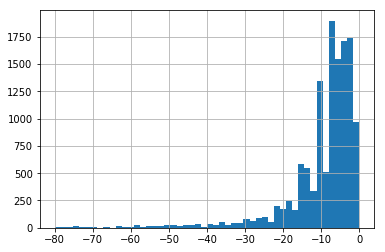

In [71]:
df2['CFM_CO2'].hist(bins = 50, range = (-80, 0))

In [72]:
df2['CFM_ETC'] = df2['CFM_CO2'] / (df2['percent_Inside'] - df2['percent_Outside'])
df2.describe()

ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 CFM_ETC 
 
 
 
 
 count 
 13010.0 
 13010.000000 
 13010.000000 
 1.301000e+04 
 13010.000000 
 
 
 mean 
 40000.0 
 -10.777121 
 0.095751 
 4.000000e-02 
 -230.943259 
 
 
 std 
 0.0 
 18.090360 
 0.031318 
 8.195149e-15 
 394.273245 
 
 
 min 
 40000.0 
 -498.400000 
 0.060100 
 4.000000e-02 
 -16950.495050 
 
 
 25% 
 40000.0 
 -12.000000 
 0.069325 
 4.000000e-02 
 -261.949742 
 
 
 50% 
 40000.0 
 -6.400000 
 0.089700 
 4.000000e-02 
 -136.850291 
 
 
 75% 
 40000.0 
 -3.200000 
 0.111000 
 4.000000e-02 
 -65.573770 
 
 
 max 
 40000.0 
 -0.408371 
 0.273300 
 4.000000e-02 
 -4.208311

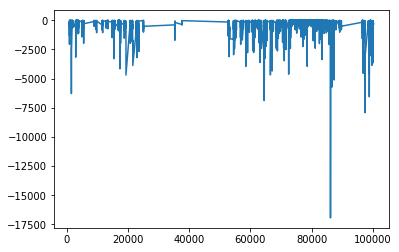

In [73]:
df2['CFM_ETC'].plot()

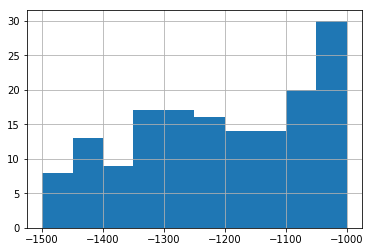

In [101]:
df2['CFM_ETC'].hist(bins = 10, range = (-1500, -1000))

In [75]:
df2['ACH'] = (df2['CFM_ETC'] / df2['ETC_Volume']) * 60
df2.describe()

ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 CFM_ETC 
 ACH 
 
 
 
 
 count 
 13010.0 
 13010.000000 
 13010.000000 
 1.301000e+04 
 13010.000000 
 13010.000000 
 
 
 mean 
 40000.0 
 -10.777121 
 0.095751 
 4.000000e-02 
 -230.943259 
 -0.346415 
 
 
 std 
 0.0 
 18.090360 
 0.031318 
 8.195149e-15 
 394.273245 
 0.591410 
 
 
 min 
 40000.0 
 -498.400000 
 0.060100 
 4.000000e-02 
 -16950.495050 
 -25.425743 
 
 
 25% 
 40000.0 
 -12.000000 
 0.069325 
 4.000000e-02 
 -261.949742 
 -0.392925 
 
 
 50% 
 40000.0 
 -6.400000 
 0.089700 
 4.000000e-02 
 -136.850291 
 -0.205275 
 
 
 75% 
 40000.0 
 -3.200000 
 0.111000 
 4.000000e-02 
 -65.573770 
 -0.098361 
 
 
 max 
 40000.0 
 -0.408371 
 0.273300 
 4.000000e-02 
 -4.208311 
 -0.006312

In [100]:
#df2['CFM_ETC'].plot.density( range = 200 )

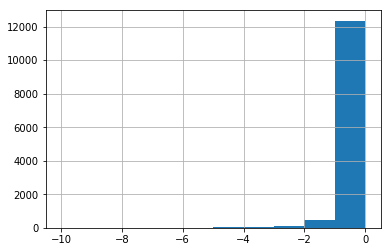

In [77]:
df2['ACH'].hist(bins = 10, range = (-10, 0))

In [78]:
df2.set_index('Time',inplace=True)
df2.head()

ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 CFM_ETC 
 ACH 
 
 
 Time 
 
 
 
 
 
 
 
 
 
 
 2016-02-22 12:12:00 
 40000.0 
 -54.4 
 0.0816 
 0.04 
 -1307.692308 
 -1.961538 
 
 
 2016-02-22 12:22:00 
 40000.0 
 -4.8 
 0.0825 
 0.04 
 -112.941176 
 -0.169412 
 
 
 2016-02-22 12:27:00 
 40000.0 
 -16.8 
 0.0804 
 0.04 
 -415.841584 
 -0.623762 
 
 
 2016-02-22 12:32:00 
 40000.0 
 -12.0 
 0.0789 
 0.04 
 -308.483290 
 -0.462725 
 
 
 2016-02-22 12:37:00 
 40000.0 
 -22.4 
 0.0761 
 0.04 
 -620.498615 
 -0.930748

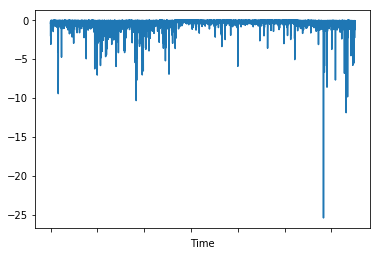

In [79]:
df2['ACH'].plot()

In [80]:
df2.reset_index(inplace = True)
df2.head(1)

Time 
 ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 CFM_ETC 
 ACH 
 
 
 
 
 0 
 2016-02-22 12:12:00 
 40000.0 
 -54.4 
 0.0816 
 0.04 
 -1307.692308 
 -1.961538

In [81]:
df2['Time'] = pd.to_datetime(df2.Time)

In [82]:
df2['Day'] = df2.Time.dt.weekday_name
df2.head()

Time 
 ETC_Volume 
 CFM_CO2 
 percent_Inside 
 percent_Outside 
 CFM_ETC 
 ACH 
 Day 
 
 
 
 
 0 
 2016-02-22 12:12:00 
 40000.0 
 -54.4 
 0.0816 
 0.04 
 -1307.692308 
 -1.961538 
 Monday 
 
 
 1 
 2016-02-22 12:22:00 
 40000.0 
 -4.8 
 0.0825 
 0.04 
 -112.941176 
 -0.169412 
 Monday 
 
 
 2 
 2016-02-22 12:27:00 
 40000.0 
 -16.8 
 0.0804 
 0.04 
 -415.841584 
 -0.623762 
 Monday 
 
 
 3 
 2016-02-22 12:32:00 
 40000.0 
 -12.0 
 0.0789 
 0.04 
 -308.483290 
 -0.462725 
 Monday 
 
 
 4 
 2016-02-22 12:37:00 
 40000.0 
 -22.4 
 0.0761 
 0.04 
 -620.498615 
 -0.930748 
 Monday

In [83]:
#df3.Day.value_counts()

In [84]:
InfiltrationData = df2.drop(df2.columns[[1,2,3,4,5]], axis =1 )
InfiltrationData.to_csv('FinalData.csv')

In [85]:
df3 = pd.read_csv('FinalData.csv', index_col = 0,  parse_dates=True)
df3.head()

Time 
 ACH 
 Day 
 
 
 
 
 0 
 2016-02-22 12:12:00 
 -1.961538 
 Monday 
 
 
 1 
 2016-02-22 12:22:00 
 -0.169412 
 Monday 
 
 
 2 
 2016-02-22 12:27:00 
 -0.623762 
 Monday 
 
 
 3 
 2016-02-22 12:32:00 
 -0.462725 
 Monday 
 
 
 4 
 2016-02-22 12:37:00 
 -0.930748 
 Monday

In [86]:
df3.dtypes

Time     object
ACH     float64
Day      object
dtype: object

In [87]:
df3['Time'] = pd.to_datetime(df2.Time)
#df3['Day'] = pd.to_datetime(df2.Time)

In [88]:
df3.dtypes

Time    datetime64[ns]
ACH            float64
Day             object
dtype: object

In [89]:
df3 = df3[df3['ACH'] < -0.6]
df3 = df3[df3['ACH'] > -5.0]
df3.describe()

ACH 
 
 
 
 
 count 
 1645.000000 
 
 
 mean 
 -1.167449 
 
 
 std 
 0.755820 
 
 
 min 
 -4.958678 
 
 
 25% 
 -1.273469 
 
 
 50% 
 -0.871972 
 
 
 75% 
 -0.708861 
 
 
 max 
 -0.600000

In [90]:
df3.head()

Time 
 ACH 
 Day 
 
 
 
 
 0 
 2016-02-22 12:12:00 
 -1.961538 
 Monday 
 
 
 2 
 2016-02-22 12:27:00 
 -0.623762 
 Monday 
 
 
 4 
 2016-02-22 12:37:00 
 -0.930748 
 Monday 
 
 
 8 
 2016-02-22 13:03:00 
 -0.766667 
 Monday 
 
 
 10 
 2016-02-22 13:13:00 
 -1.320388 
 Monday

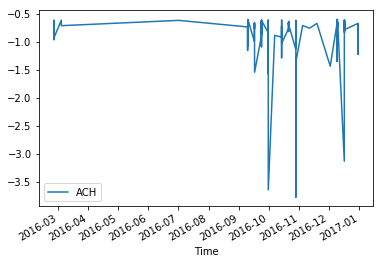

In [91]:
Fridays = df3[df3['Day'] == 'Friday']
Fridays.set_index('Time',inplace=True)
Fridays.plot()

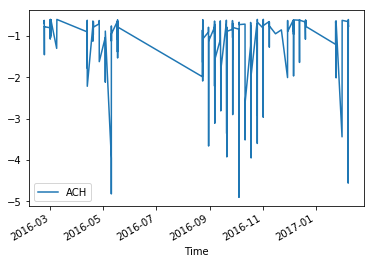

In [92]:
Tuesdays = df3[df3['Day'] == 'Tuesday']
Tuesdays.set_index('Time',inplace=True)
Tuesdays.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f754e7f0828>]],
      dtype=object)

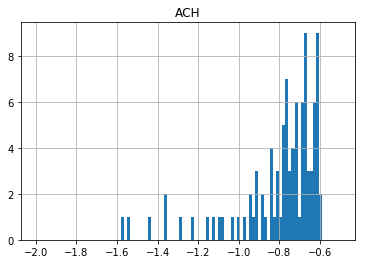

In [93]:
Fridays.hist(bins = 100, range = (-2 , -0.5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f754e719c18>]],
      dtype=object)

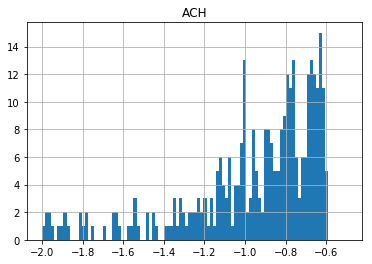

In [94]:
Tuesdays.hist(bins = 100, range = (-2 , -0.5))

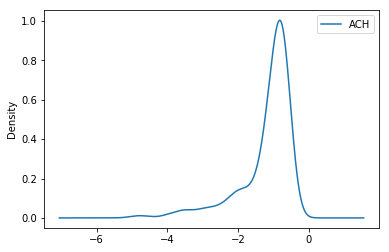

In [95]:
Tuesdays.plot.density()

In [96]:
Tuesdays.describe()

ACH 
 
 
 
 
 count 
 376.000000 
 
 
 mean 
 -1.202934 
 
 
 std 
 0.763339 
 
 
 min 
 -4.902857 
 
 
 25% 
 -1.289797 
 
 
 50% 
 -0.919636 
 
 
 75% 
 -0.740748 
 
 
 max 
 -0.600000